
<h1> <center> Sports Celebrity Image Classification </center> </h1>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

<h5>1. First let's detect faces and eyes of test images before going to the main dataset </h5>

In [2]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

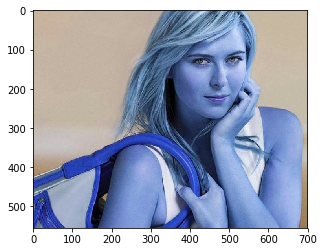

In [3]:
plt.imshow(img)

In [4]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gray.shape

(555, 700)

In [5]:
img_gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

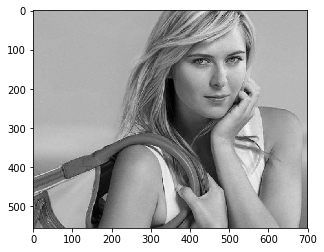

In [6]:
plt.imshow(img_gray , cmap='gray')

<h7> <b> Using Haar Cascades to detect the face from images </b> </h7>

In [7]:
#face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
faces

array([[352,  38, 233, 233]], dtype=int32)

In [8]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

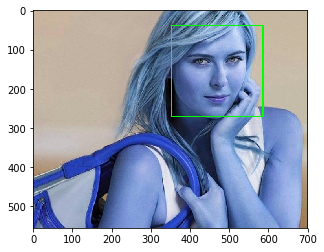

In [9]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

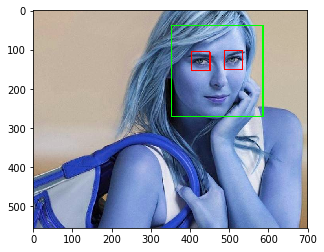

In [10]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

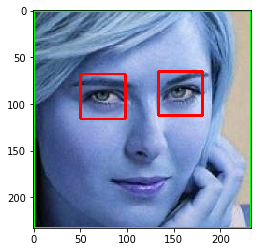

In [11]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [12]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

<h5> 2. Custom Method to directly get the cropped image after detecting the face and eyes </h5>

In [13]:
def get_cropped_image_directly(img_path):
    img2 = cv2.imread(img_path)
    img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    faces= face_cascade.detectMultiScale(img2_gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = img2_gray[y:y+h, x:x+w]
        roi_color = img2[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

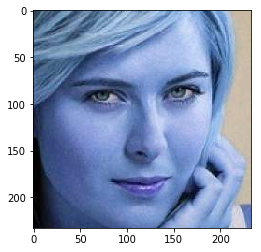

In [14]:
cropped_image= get_cropped_image_directly('./test_images/sharapova1.jpg')
plt.imshow(cropped_image)

<h7><b> Incase Face and Eyes are not clearly visible nothing should be returned</b> </h7>

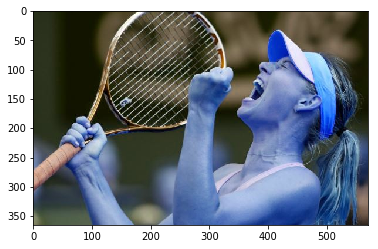

In [15]:
image2 = cv2.imread('./test_images/sharapova2.jpg')
plt.imshow(image2)

In [16]:
cropped_image2= get_cropped_image_directly('./test_images/sharapova2.jpg')
cropped_image2

<h5> 3. Creating a new folder "Cropped Images Dataset" to store the cropped images </h5> 

In [17]:
dataset_path = './images_dataset/'
new_path_to_cropped_images_dataset = './images_dataset/cropped_images_dataset/'

In [18]:
import os
img_dirs=[]
for entry in os.scandir(dataset_path):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [19]:
img_dirs

['./images_dataset/cropped_images_dataset',
 './images_dataset/lionel_messi',
 './images_dataset/maria_sharapova',
 './images_dataset/roger_federer',
 './images_dataset/serena_williams',
 './images_dataset/virat_kohli']

In [20]:
import shutil
if os.path.exists(new_path_to_cropped_images_dataset):
    shutil.rmtree(new_path_to_cropped_images_dataset)
os.mkdir(new_path_to_cropped_images_dataset)

In [21]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_directly(entry.path)
        if roi_color is not None:
            cropped_folder = new_path_to_cropped_images_dataset + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./images_dataset/cropped_images_dataset/lionel_messi
Generating cropped images in folder:  ./images_dataset/cropped_images_dataset/maria_sharapova
Generating cropped images in folder:  ./images_dataset/cropped_images_dataset/roger_federer
Generating cropped images in folder:  ./images_dataset/cropped_images_dataset/serena_williams
Generating cropped images in folder:  ./images_dataset/cropped_images_dataset/virat_kohli


<h5>4. After generating the cropped images folder we have to manually examine the folder and delete the unwanted images</h5>

<h5> 5.Wavelet Transformation of Images </h5>

<p> <b> we use wavelet transformed image as a feature for training our model because in a wavelet transformed image we can
        see all the edges clearly which acts as clues to identify different facial features such as eyes, nose etc. </b></p>

In [22]:
# Method to do wavelet transform
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

<p> <b> Wavelet Transform on test image </b> </p>

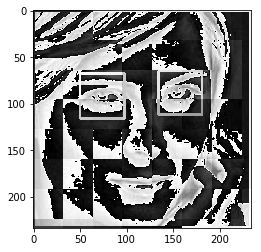

In [23]:
sample_wavelet_image = w2d(cropped_img,'db1',5)
plt.imshow(sample_wavelet_image, cmap='gray') 

<p> <b>6. Now, let's create X and Y matrices for training our model. Where X= Vertical Stacking of Raw Image + Wavelet Transformed Image and Y= Numbers assigned to the sport celebrities </b> </p>

In [24]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi1.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi10.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi11.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi12.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi13.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi14.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi15.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi16.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi17.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi18.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi19.png',
  './images_dataset/cropped_images_dataset/lionel_messi\\lionel_messi2.png',
  './images_dataset/cropped_images_dataset/lionel_

In [25]:
celebrity_number_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    celebrity_number_dict[celebrity_name] = count
    count = count + 1
celebrity_number_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [26]:
X =[]
y =[]
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(celebrity_number_dict[celebrity_name])     

In [27]:
len(X[0])

4096

In [28]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(186, 4096)

<p> <b>7. Training The Model </b></p>

<p>We will use SVM with rbf kernel tuned  with heuristic finetuning </p>

In [29]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import _data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7659574468085106

In [31]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.71      0.71      0.71         7
           2       0.57      0.67      0.62         6
           3       1.00      0.70      0.82        10
           4       0.81      0.93      0.87        14

    accuracy                           0.77        47
   macro avg       0.76      0.74      0.74        47
weighted avg       0.78      0.77      0.77        47



<p><b> Let's try to use grid search CV to try out different models with different parameters and find the best possible model </b></p>

In [32]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [33]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [34]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.755291,"{'svc__C': 10, 'svc__kernel': 'rbf'}"
1,random_forest,0.698413,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.776984,{'logisticregression__C': 1}


In [35]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc', SVC(C=10, gamma='auto', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [36]:
best_estimators['svm'].score(X_test,y_test)

0.7659574468085106

In [37]:
best_estimators['random_forest'].score(X_test,y_test)

0.6382978723404256

In [38]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7659574468085106

In [39]:
best_clf = best_estimators['logistic_regression']

In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  1,  0,  2],
       [ 1,  5,  1,  0,  0],
       [ 1,  1,  4,  0,  0],
       [ 1,  0,  1,  7,  1],
       [ 0,  1,  0,  0, 13]], dtype=int64)

Text(69,0.5,'Truth')

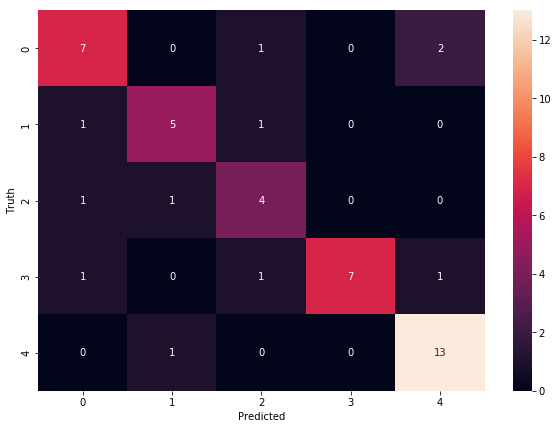

In [41]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h5> 8. Save The Trained Model </h5>

In [42]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

<h5> 9. Save Class Dictionary </h5>

In [43]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(celebrity_number_dict))